<a href="https://colab.research.google.com/github/ArmanBari123/GANs-for-synthetic-data/blob/main/GANs_for_Tabular_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparison of Data Generation with GANs**

-  Arman Bari (23384)
-  Rizwan Ansari (23398)

Project Advisor : **Dr Taqriq Mehmood**

# Introduction

Synthetic datasets can be usefull to eliminate risk in the event of an accidental breach and  preserving the privacy of the people represented by the data (generally, company customers ,respondents of a survey). It is also useful to enhance the machine learning model performance where data size is not adequate to train the models .

Estimatating the Probabity distribution of complex data such  multimodal continuous variables,non-gausians distributions and severe imbalance of categorical columns  is a bit complicated and non-trivial task.To address this problem we used conditional (CTGAN)

**CTGAN Model**

CTGAN is a type of Generative Adversarial Network (GAN) which is used generate synthetic data that resembles real-world tabular data, such as data in a spreadsheet or database table. This variant of GAN uses mode-specific normalization to effectivey estimate the pdf of multimodel and non-gausian distributions.

**Performance Evaluation**

To evaluate the performance of GAN we used five different dataset (3 classification and 2 regression) fron UCI machine learning reposatory and compare the performace of Machine learning models such as SVM,random forest ,adaboost and MLP using orignal and Fake data .
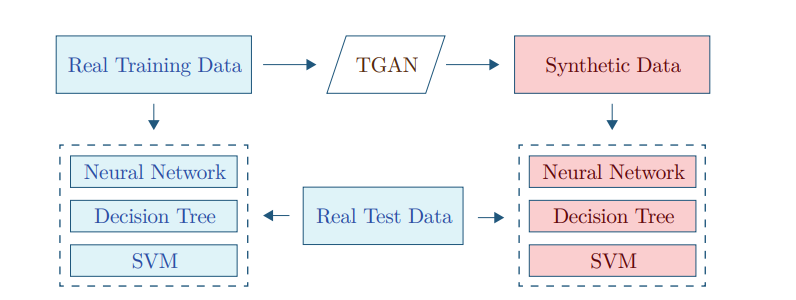




 

# Import Libraries and Requirements

In [ ]:
# HIDE OUTPUT
CMD = "wget https://raw.githubusercontent.com/Diyago/"\
  "GAN-for-tabular-data/master/requirements.txt"

!{CMD}  
!pip install -r requirements.txt
!pip install tabgan
!pip install simple-colors


from tabgan.sampler import OriginalGenerator, GANGenerator
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from simple_colors import *

from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Data Set  1  **Breast Cancer**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link]

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/


**Attribute Information:**

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)




In [ ]:
path = "/content/drive/MyDrive/Data Sets For TABGAN/breast-cancer-wisconsin.csv"
df = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe
df.columns = ['Id', 'Clump_thickness', 'Uniformity_cell_size', 'Uniformity_cell_shape', 'Marginal_adhesion', 'Single_e_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class']
df.head(5)

,Id,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_adhesion,Single_e_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


## Helper Functions for classification 
below are the helper functions created to assist us in repetitive tasks 

In [ ]:

from IPython.display import display_html 
from IPython.display import display_html
from itertools import chain,cycle


def Datagen(X_train_real,y_train_real,X_test_real):

"""To generate the fake data we used tabgan library and built a helper function which will be used for all five datasets """

  x_GAN, y_GAN = GANGenerator(gen_x_times=1.6, cat_cols=None,
            bot_filter_quantile=0.001, top_filter_quantile=0.999, is_post_process=True,
            adversarial_model_params={
                "metrics": "AUC", "max_depth": 2, "max_bin": 100, 
                "learning_rate": 0.02, "random_state": 42, "n_estimators": 500,
            }, pregeneration_frac=2, only_generated_data=False,
            gan_params = {"batch_size": 500, "patience": 25, "epochs" : 1000,}).generate_data_pipe(X_train_real, y_train_real, X_test_real, )
    

  return x_GAN,y_GAN




def Model_Evaluation(X_train,y_train,X_test,y_test):
  """This function with return use the performance report of different models """

  classifiers = {
      "Support Vector Machine":SVC(kernel="linear", C=0.025),
      "Random Forest":RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "Mulilaryer Perceptron": MLPClassifier(alpha=1, max_iter=1000),
      "Adaboost":AdaBoostClassifier()}
      
  for modelname, clf in classifiers.items():
    training=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(green(modelname,'bold'))
    print(classification_report(y_test, y_pred))
    print(red('f1score',['bold','underlined']),f1_score(y_test, clf.predict(X_test), average='macro'))



def Model_Evaluation_reg(X_train,y_train,X_test,y_test):
    """"This function is used to evaluate the performance of Regression"""


    from sklearn.svm import SVR
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.neural_network import MLPRegressor
    from sklearn.ensemble import AdaBoostRegressor
    from sklearn.metrics import r2_score
    Reg = {
        "Support Vector Machine":SVR(),
        "Random Forest":RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
        "Mulilaryer Perceptron": MLPRegressor(),
        "Adaboost":AdaBoostRegressor()}
        
    for modelname, reg in Reg.items():
        training=reg.fit(X_train, y_train)
        y_pred=reg.predict(X_test)
        print(green(modelname,'bold'))
        print(red('R2=squared',['bold','underlined']),r2_score(y_test, y_pred,
            multioutput='variance_weighted'))

    
    




def display_side_by_side(*args,titles=cycle([''])):
  
  
  """Compare the Real and fake data by diplaying the df in parallel """
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)




  
def encode(df,*columns):
  """" This function is used to treat categorical data"""
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    cols=[]
    for i in columns:
        cols.append(i)
    encode_type=input('Enter encode type')
    if encode_type=='label':
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        for i in cols:
            df[i]=le.fit_transform(df[[i]])
        return df
    elif encode_type=='ordinal':
        for i in cols:

            ord_dict={}
            print(i)
            n=int(input("enter a number of unique values present in the column: "))
            for j in range(n):
                key=input('Unique value for the column')
                value=int(input('Enter ordinal number for the value'))
                ord_dict[key]=value
            x=df[i].map(ord_dict)
            df[i]=x
        return df
    elif encode_type=='one-hot':
        df2=pd.get_dummies(df,columns=cols)
        
        return df2
    else:
        print('Invalid encode type, select one from label,ordinal,one-hot')


    

  
  



In [ ]:
#real data 
df=df.drop(['Bare_nuclei','Id'], axis=1)
df.head(5)
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
# train test split for CGans input 
X_train_real, X_test_real, y_train_real, y_test_real = sklearn.model_selection.train_test_split(x,y, test_size=0.33, random_state=42)

#Gans requires pandas df 
X_train_real=pd.DataFrame(X_train_real)
y_train_real=pd.DataFrame(y_train_real)
X_test_real=pd.DataFrame(X_test_real)


## Fake Breast Cancer data using CTGAN 

Using the helper function we are creating fake samples using CTGAN



In [ ]:
x_GAN, y_GAN=Datagen(X_train_real,y_train_real,X_test_real)

Fitting CTGAN transformers for each column:   0%|          | 0/9 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/1000 [00:00<?, ?it/s]

## **Models Evaluation With Orignal Data** 

We will use train test set from orignal data frame and run Machine learning pipeline 

In [ ]:
orignal=Model_Evaluation(X_train_real,y_train_real,X_test_real,y_test_real)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-50-53cfe09d1b30>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  training=clf.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Support Vector Machine
              precision    recall  f1-score   support

           2       0.97      0.97      0.97       149
           4       0.94      0.95      0.95        82

    accuracy                           0.96       231
   macro avg       0.96      0.96      0.96       231
weighted avg       0.96      0.96      0.96       231

f1score 0.9575757575757575
Random Forest
              precision    recall  f1-score   support

           2       0.99      0.97      0.98       149
           4       0.94      0.98      0.96        82

    accuracy                           0.97       231
   macro avg       0.96      0.97      0.97       231
weighted avg       0.97      0.97      0.97       231

f1score 0.9671775093880037
Mulilaryer Perceptron
              precision    recall  f1-score   support

           2       0.97      0.97      0.97       149
           4       0.94      0.94      0.94        82

    accuracy                           0.96       231
   macro avg   

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## **Models Evaluation With Fake data**
we will use Fake data set to train Machine learning Models and evalute the performace using orignal test dataset 

In [ ]:
Fake=Model_Evaluation(x_GAN,y_GAN,X_test_real,y_test_real)

Support Vector Machine
              precision    recall  f1-score   support

           2       0.95      0.97      0.96       149
           4       0.94      0.90      0.92        82

    accuracy                           0.94       231
   macro avg       0.94      0.93      0.94       231
weighted avg       0.94      0.94      0.94       231

f1score 0.9380326448071645
Random Forest
              precision    recall  f1-score   support

           2       0.94      0.97      0.95       149
           4       0.94      0.89      0.91        82

    accuracy                           0.94       231
   macro avg       0.94      0.93      0.93       231
weighted avg       0.94      0.94      0.94       231

f1score 0.9330711920529801
Mulilaryer Perceptron
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.95      0.97      0.96       149
           4       0.94      0.90      0.92        82

    accuracy   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Result Discusion 
To evealue the performance of GANs we trained  different models using **Orignal** and **Fake data** and evaluate the performace of the models using orignal data .
We noticed that outstanding the performance of support vector machine and random forest with fake data however MLP and adaboost does't seems to show promising results with fake data which means that MLP and adaboost are extremely sensitive to small change in **data drift** .


## **Orignal vs Fake data**
In the upcoming cells we will display the orginal and samples and visualize the distibutions of numerical columns using KDE plot and compare them 



In [ ]:
display_side_by_side(x.head(5),x_GAN.head(5), titles=['Orignal','Fake'])

,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_adhesion,Single_e_cell_size,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,4,4,5,7,3,2,1
1,3,1,1,1,2,3,1,1
2,6,8,8,1,3,3,7,1
3,4,1,1,3,2,3,1,1
4,8,10,10,8,7,9,7,1
,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_adhesion,Single_e_cell_size,Bland_chromatin,Normal_nucleoli,Mitoses
0,2,5,4,8,1,2,4,8
1,1,1,7,8,1,3,3,10
2,4,1,3,3,1,2,3,10
3,3,2,2,9,1,2,4,2


from the above samples we can not compare densities of orignal and fake data therefore we will use KDE plot to analyze the performace of CTGAN.

In [ ]:
# Data preparation for KDE plot 
x_GAN['Data Sourse']='Fake' # adding labels
x['Data Sourse']='Orignal'
df_compare=pd.concat([x,x_GAN]) # combining fake and real data 
df_compare = df_compare.reset_index() # reindexing the dataframe 

##  kernel density estimate

**A kernel density estimate (KDE)** plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

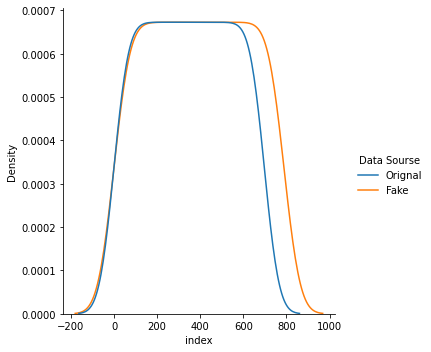

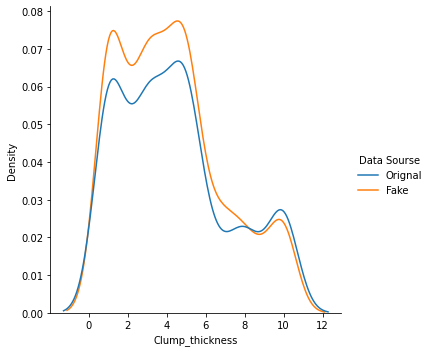

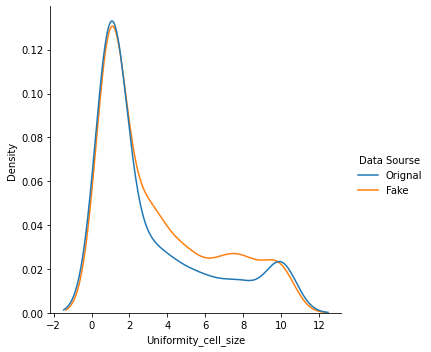

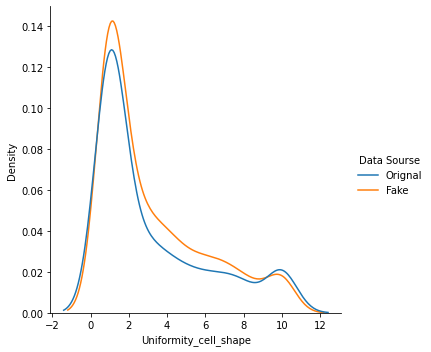

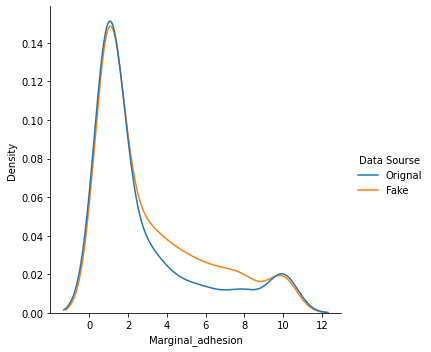

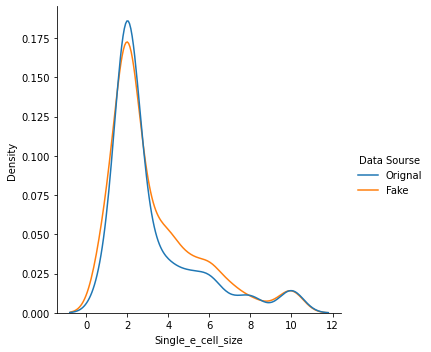

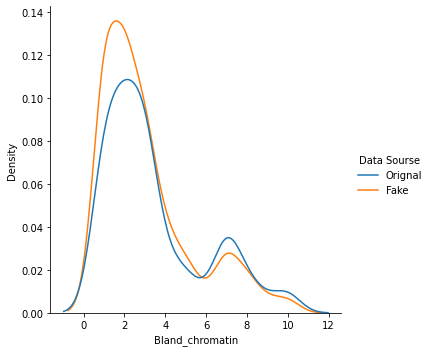

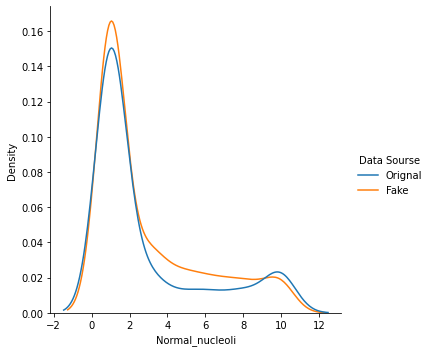

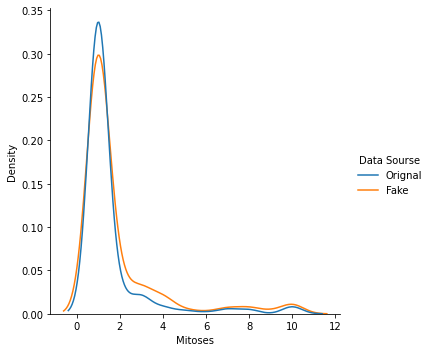

In [ ]:

for column_name, column_series in df_compare.iloc[:, :-1].iteritems():
     pass
     sns.displot(df_compare, x=df_compare[column_name], hue="Data Sourse", kind="kde")

Observing the distribution of the original and fake data, we can conclude that CGAN generated outstanding results. CGAN not only outperformed in estimating normal Gaussian distributions but also effectively estimated extremely complicated and strongly asymmetrical bimodal data densities.

## Datatypes of Orignal and Fake data 

In [ ]:
print("Orignal dtypes")
print(x.dtypes)
print("GAN dtypes")
print(x_GAN.dtypes)

Orignal dtypes
Clump_thickness           int64
Uniformity_cell_size      int64
Uniformity_cell_shape     int64
Marginal_adhesion         int64
Single_e_cell_size        int64
Bland_chromatin           int64
Normal_nucleoli           int64
Mitoses                   int64
Data Sourse              object
dtype: object
GAN dtypes
Clump_thickness           int64
Uniformity_cell_size      int64
Uniformity_cell_shape     int64
Marginal_adhesion         int64
Single_e_cell_size        int64
Bland_chromatin           int64
Normal_nucleoli           int64
Mitoses                   int64
Data Sourse              object
dtype: object


CTGAN maintained the datatype of all orignal columns  !

# Data Set 2  **Wine  Quality**

**Data Set Information**:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


**Attribute Information**:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

In [ ]:
path = "/content/drive/MyDrive/Data Sets For TABGAN/winequality-red (1).csv"
df2 = pd.read_csv(path)

In [ ]:
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
#real data 
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

X_train_real, X_test_real, y_train_real, y_test_real = sklearn.model_selection.train_test_split(x,y, test_size=0.33, random_state=42)

#Gans requires pandas df 
X_train_real=pd.DataFrame(X_train_real)
y_train_real=pd.DataFrame(y_train_real)
X_test_real=pd.DataFrame(X_test_real)


## Generating Fake Wine quality data

In [ ]:
x_GAN, y_GAN=Datagen(X_train_real,y_train_real,X_test_real)

Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/2000 [00:00<?, ?it/s]

##**Models Evaluation With Orignal Data** 

In [ ]:
orignal=Model_Evaluation(X_train_real,y_train_real,X_test_real,y_test_real)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machine
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.61      0.78      0.69       217
           6       0.49      0.58      0.53       213
           7       0.00      0.00      0.00        70
           8       0.00      0.00      0.00         7

    accuracy                           0.55       528
   macro avg       0.18      0.23      0.20       528
weighted avg       0.45      0.55      0.50       528

f1score 0.203196785186736
Random Forest
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.68      0.67      0.67       217
           6       0.50      0.67      0.58       213
           7       0.54      0.21      0.31        70
           8       0.00      0.00      0.00         7

    accuracy  

<ipython-input-9-641e632a2b7d>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  training=clf.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Mulilaryer Perceptron
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.66      0.60      0.63       217
           6       0.49      0.74      0.59       213
           7       0.55      0.09      0.15        70
           8       0.00      0.00      0.00         7

    accuracy                           0.55       528
   macro avg       0.28      0.24      0.23       528
weighted avg       0.54      0.55      0.52       528

f1score 0.22747995602571802


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Adaboost
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.56      0.81      0.66       217
           6       0.47      0.46      0.46       213
           7       0.00      0.00      0.00        70
           8       0.00      0.00      0.00         7

    accuracy                           0.52       528
   macro avg       0.17      0.21      0.19       528
weighted avg       0.42      0.52      0.46       528

f1score 0.18750185155560298


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Models Evaluation With Fake data**

In [ ]:
Fake=Model_Evaluation(x_GAN,y_GAN,X_test_real,y_test_real)

Support Vector Machine
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.56      0.86      0.68       217
           6       0.47      0.42      0.44       213
           7       0.00      0.00      0.00        70
           8       0.00      0.00      0.00         7

    accuracy                           0.52       528
   macro avg       0.17      0.21      0.19       528
weighted avg       0.42      0.52      0.46       528

f1score 0.1868143309297732
Random Forest
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.65      0.76      0.70       217
           6       0.50      0.64      0.56       213
           7       1.00      0.01      0.03        70
           8       0.00      0.00      0.00         7

    accuracy 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mulilaryer Perceptron
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.55      0.81      0.65       217
           6       0.46      0.44      0.45       213
           7       0.00      0.00      0.00        70
           8       0.00      0.00      0.00         7

    accuracy                           0.51       528
   macro avg       0.17      0.21      0.18       528
weighted avg       0.41      0.51      0.45       528

f1score 0.18356615822583566


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Adaboost
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.20      0.05      0.08        19
           5       0.56      0.74      0.63       217
           6       0.45      0.32      0.37       213
           7       0.08      0.03      0.04        70
           8       0.02      0.14      0.03         7
           9       0.00      0.00      0.00         0

    accuracy                           0.44       528
   macro avg       0.19      0.18      0.17       528
weighted avg       0.43      0.44      0.42       528

f1score 0.16642662871005204


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Result disucsion
We can see that the models do not seem to be performing satisfactorily becasue Multiclassification problems require special attention and hyperparametric tuning, Although we are getting poor results, but the scope of this project is to compare the densities of original and Gan generated data therefore we will focus on GANs parameters to minimize the Kl divergence of the original and fake datasets.

## **Orignal vs Fake data**




In [ ]:
display_side_by_side(x.head(5),x_GAN.head(5), titles=['Orignal','Fake'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,12.527992,0.828351,0.354796,2.373861,0.143217,16.927051,124.823774,1.002131,3.559762,0.446443,13.410249
1,13.655425,0.400734,0.223705,4.491919,0.252846,26.927904,9.372703,1.002202,3.687700,0.496463,13.495549
2,12.616390,0.919342,0.157817,4.417490,0.213156,17.868812,28.562877,0.998969,3.664339,0.405269,11.929681
3,8.810065,0.724687,0.299434,8.252000,0.419229,2.003839,34.838893,1.000720,3.668834,0.517814,12.629968


In [ ]:
x.describe()
x_GAN.describe()

display_side_by_side(x.describe(),x_GAN.describe(), titles=['Orignal summary','Fake summary'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000
,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000


From the above original and fake data summary, we say that the mean of a few columns of fake data such as fixed acidity, and citric acid has shifted slightly, therefore, we change the hyperparameters of CGAN to generate good-quality data.

In [ ]:
x_GAN['Data Sourse']='Fake'
x['Data Sourse']='Orignal'
df_compare=pd.concat([x,x_GAN])
df_compare = df_compare.reset_index()

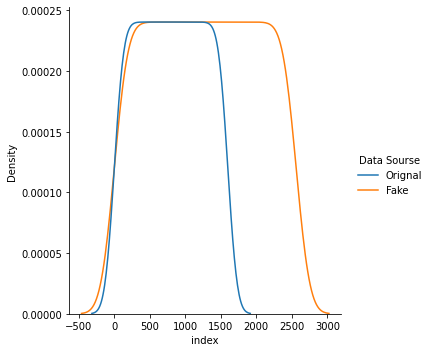

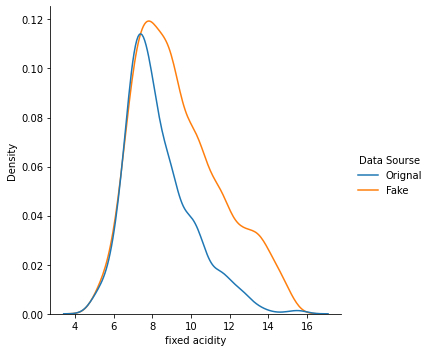

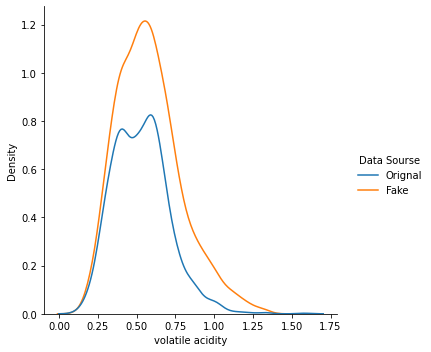

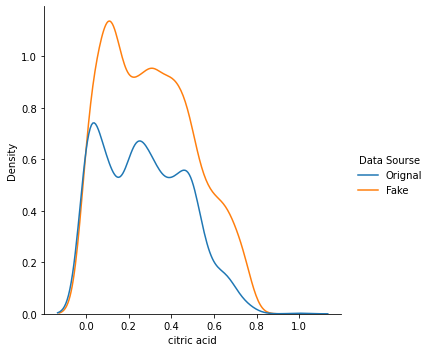

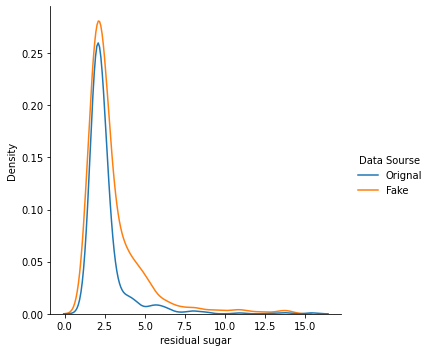

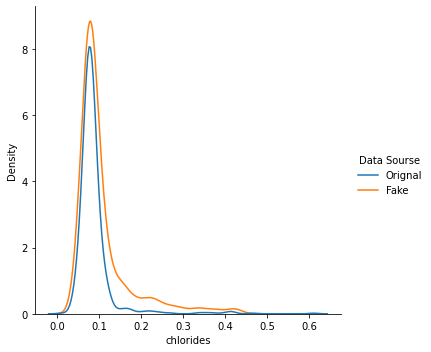

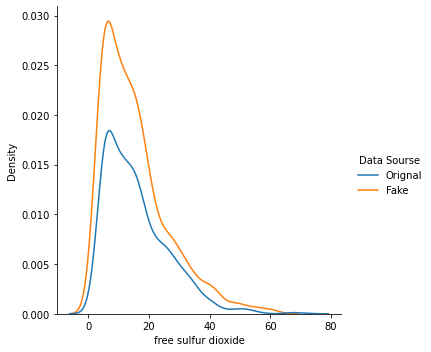

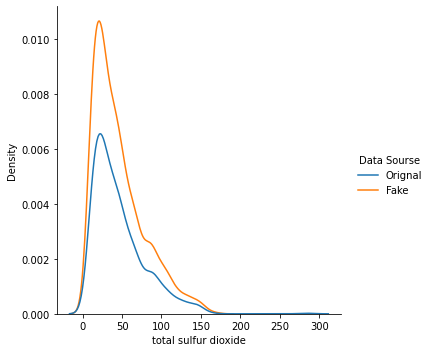

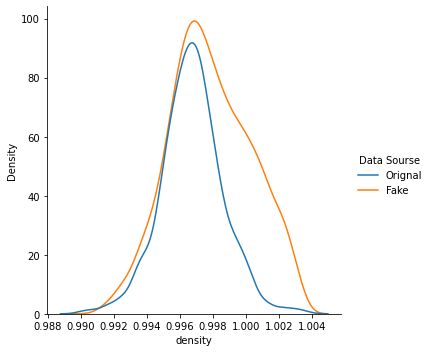

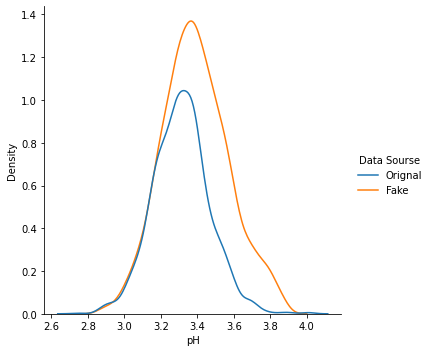

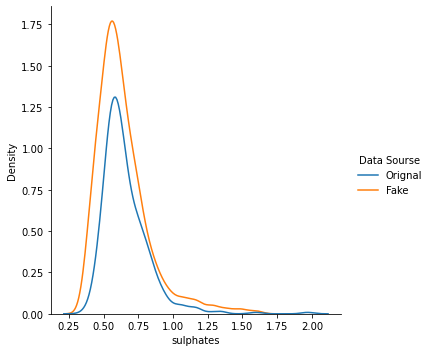

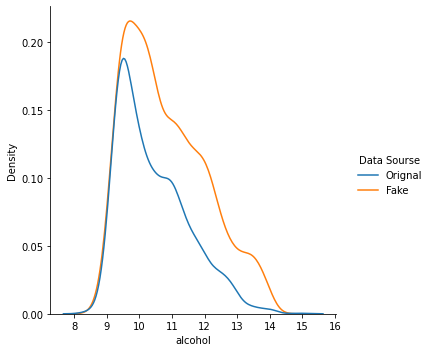

In [ ]:

for column_name, column_series in df_compare.iloc[:, :-1].iteritems():
     pass
     sns.displot(df_compare, x=df_compare[column_name], hue="Data Sourse", kind="kde")

## Tuning  CGAN to improve results 

- Increaing the number of epocs (Iteration)

In [ ]:
def Datagen(X_train_real,y_train_real,X_test_real):



  x_GAN, y_GAN = GANGenerator(gen_x_times=1.6, cat_cols=None,
            bot_filter_quantile=0.001, top_filter_quantile=0.999, is_post_process=True,
            adversarial_model_params={
                "metrics": "AUC", "max_depth": 2, "max_bin": 100, 
                "learning_rate": 0.05, "random_state": 42, "n_estimators": 500,
            }, pregeneration_frac=2, only_generated_data=False,
            gan_params = {"batch_size": 500, "patience": 25, "epochs" : 2000,}).generate_data_pipe(X_train_real, y_train_real, X_test_real, )
    

  return x_GAN,y_GAN


In [ ]:
x_GAN, y_GAN=Datagen(X_train_real,y_train_real,X_test_real)

Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/2000 [00:00<?, ?it/s]

## **Models Evaluation With New Fake Data**

In [ ]:
Fake=Model_Evaluation(x_GAN,y_GAN,X_test_real,y_test_real)

Support Vector Machine
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.65      0.73      0.69       217
           6       0.49      0.66      0.56       213
           7       0.00      0.00      0.00        70
           8       0.00      0.00      0.00         7

    accuracy                           0.56       528
   macro avg       0.19      0.23      0.21       528
weighted avg       0.47      0.56      0.51       528

f1score 0.20826256725506206
Random Forest
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.68      0.68      0.68       217
           6       0.49      0.70      0.58       213
           7       0.00      0.00      0.00        70
           8       0.00      0.00      0.00         7

    accuracy

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mulilaryer Perceptron
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.59      0.74      0.66       217
           6       0.47      0.54      0.50       213
           7       0.33      0.04      0.08        70
           8       0.00      0.00      0.00         7

    accuracy                           0.53       528
   macro avg       0.23      0.22      0.21       528
weighted avg       0.47      0.53      0.48       528

f1score 0.2052811786677734


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Adaboost
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       0.05      0.50      0.09         2
           4       0.00      0.00      0.00        19
           5       0.43      0.27      0.33       217
           6       0.40      0.59      0.48       213
           7       0.00      0.00      0.00        70
           8       0.00      0.00      0.00         7

    accuracy                           0.35       528
   macro avg       0.13      0.19      0.13       528
weighted avg       0.34      0.35      0.33       528

f1score 0.12852485250046422


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Orignal vs Fake data with changed hyperparamters




In [ ]:
display_side_by_side(x.head(5),x_GAN.head(5), titles=['Orignal','Fake with more iterations'])

Orignal 
 
 
 
 fixed acidity 
 volatile acidity 
 citric acid 
 residual sugar 
 chlorides 
 free sulfur dioxide 
 total sulfur dioxide 
 density 
 pH 
 sulphates 
 alcohol 
 Data Sourse 
 
 
 
 
 0 
 7.4 
 0.70 
 0.00 
 1.9 
 0.076 
 11.0 
 34.0 
 0.9978 
 3.51 
 0.56 
 9.4 
 Orignal 
 
 
 1 
 7.8 
 0.88 
 0.00 
 2.6 
 0.098 
 25.0 
 67.0 
 0.9968 
 3.20 
 0.68 
 9.8 
 Orignal 
 
 
 2 
 7.8 
 0.76 
 0.04 
 2.3 
 0.092 
 15.0 
 54.0 
 0.9970 
 3.26 
 0.65 
 9.8 
 Orignal 
 
 
 3 
 11.2 
 0.28 
 0.56 
 1.9 
 0.075 
 17.0 
 60.0 
 0.9980 
 3.16 
 0.58 
 9.8 
 Orignal 
 
 
 4 
 7.4 
 0.70 
 0.00 
 1.9 
 0.076 
 11.0 
 34.0 
 0.9978 
 3.51 
 0.56 
 9.4 
 Orignal 
 
 
 Fake with more iterations 
 
 
 
 fixed acidity 
 volatile acidity 
 citric acid 
 residual sugar 
 chlorides 
 free sulfur dioxide 
 total sulfur dioxide 
 density 
 pH 
 sulphates 
 alcohol 
 
 
 
 
 0 
 5.793316 
 0.702846 
 0.078808 
 4.987469 
 0.167279 
 1.552827 
 22.791382 
 1.000852 
 3.009909 
 0.791962 
 11.936753 
 
 
 1 
 6.527112 
 0.749970 
 0.246036 
 5.728126 
 0.209521 
 1.484343 
 10.091141 
 1.002842 
 3.529431 
 0.987815 
 10.700540 
 
 
 2 
 5.714659 
 0.426856 
 0.486853 
 5.019483 
 0.346925 
 1.681849 
 21.220401 
 1.000959 
 3.132350 
 0.726165 
 11.196973 
 
 
 3 
 6.040500 
 0.514905 
 0.133875 
 7.434334 
 0.155907 
 2.139424 
 53.815427 
 1.000659 
 3.240442 
 0.868072 
 12.272609 
 
 
 4 
 5.309801 
 0.389149 
 0.244793 
 3.055920 
 0.170962 
 11.353883 
 18.571532 
 1.003315 
 3.305026 
 0.932083 
 11.784865

In [ ]:

display_side_by_side(x.describe(),x_GAN.describe(), titles=['Orignal summary','Fake summary with more iterations'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000
,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000


Previously we noticed the deviation between original and fake data and consequently we tried to increase the number of epochs as a result we have seen no deviation between the mean of original and fake data.

In [ ]:
x_GAN['Data Sourse']='Fake'
x['Data Sourse']='Orignal'
df_compare=pd.concat([x,x_GAN])
df_compare = df_compare.reset_index()

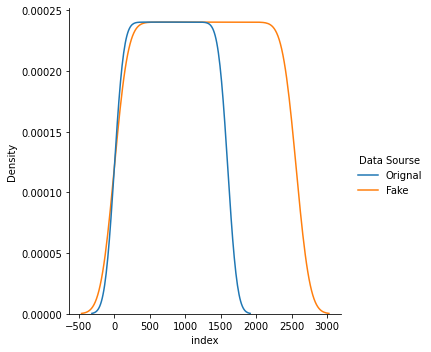

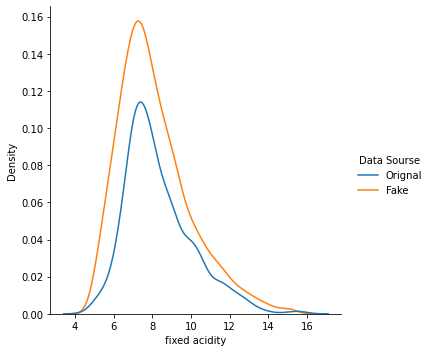

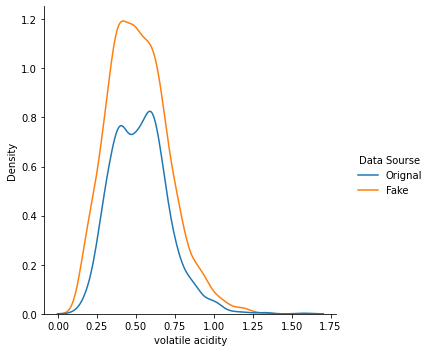

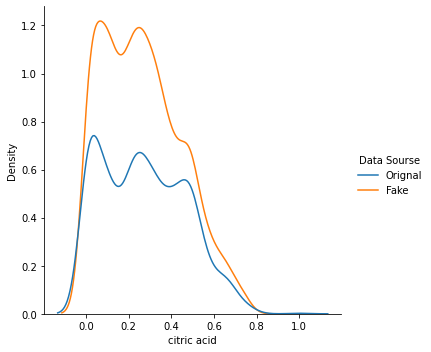

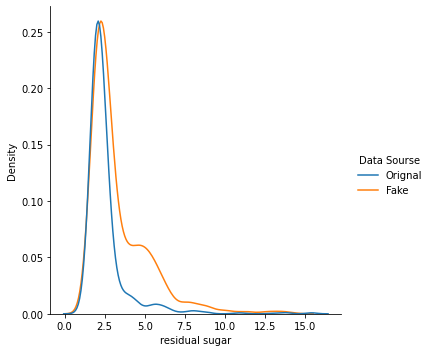

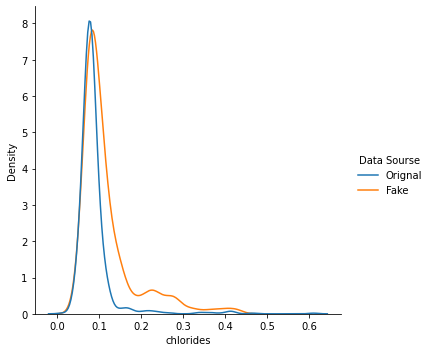

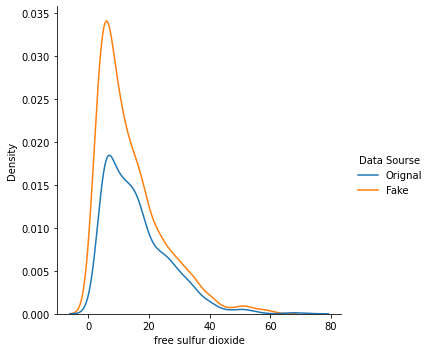

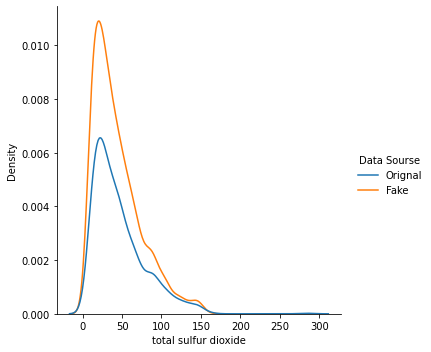

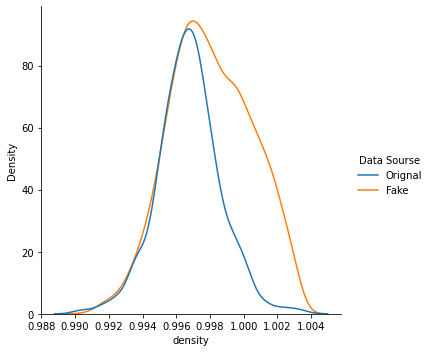

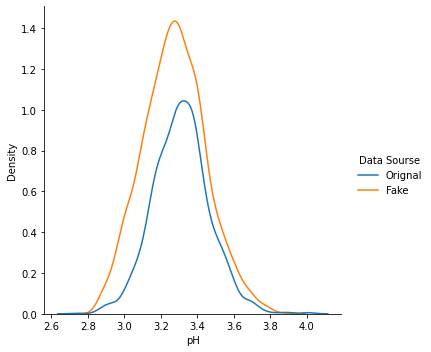

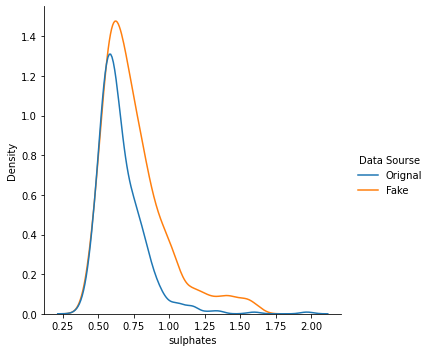

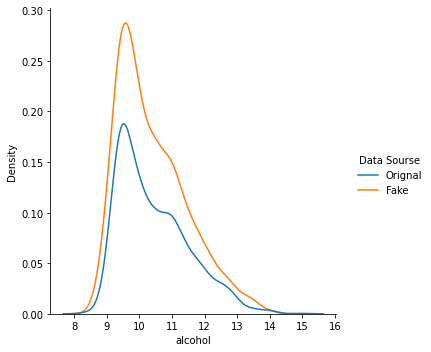

In [ ]:

for column_name, column_series in df_compare.iloc[:, :-1].iteritems():
     pass
     sns.displot(df_compare, x=df_compare[column_name], hue="Data Sourse", kind="kde")

Key points from the analyis of Dataset 2
-  Multclass dataset requires aditional attention to model the data 
-  Increasing the number of epochs can improved the performance of the CGAN 
-  Perfromance of CGAN  depend upon the compexity of orignal data 


# Data set 3 **Census data**
Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset

**Data Set Information:**

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.


**Attribute Information:**

Listing of attributes:

>50K, <=50K

-  age: continuous.
-  workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
-  fnlwgt: continuous.
-  education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
-  marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
-  relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
-  race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
-  sex: Female, Male.
-  capital-gain: continuous.
-  capital-loss: continuous.
-  hours-per-week: continuous.
-  native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
path = "/content/drive/MyDrive/Data Sets For TABGAN/adult.csv"
df3 = pd.read_csv(path)
df3.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Class']
df3.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Encoding class label

In [ ]:
encode(df3,'Class')

Enter encode typelabel


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [ ]:
#check the datatype 
df3.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Class              int64
dtype: object

In [ ]:
#list of categorical data
dfs = df3.select_dtypes(include=['object'])
list(dfs.columns)

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'Class']

## Generating Fake Data 

In [ ]:
#real data 
x=df3.iloc[:,:-1]
y=df3.iloc[:,-1]

X_train_real, X_test_real, y_train_real, y_test_real = sklearn.model_selection.train_test_split(x,y, test_size=0.33, random_state=42)

#Gans requires pandas df 
X_train_real=pd.DataFrame(X_train_real)
y_train_real=pd.DataFrame(y_train_real)
X_test_real=pd.DataFrame(X_test_real)


In [ ]:
x_GAN, y_GAN=Datagen(X_train_real,y_train_real,X_test_real)

Fitting CTGAN transformers for each column:   0%|          | 0/15 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/1 [00:00<?, ?it/s]

## Oignal vs Fake data

In [ ]:
display_side_by_side(x.head(5),x_GAN.head(5), titles=['Orignal','Fake'])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,17,Private,157117,10th,9,Never-married,Machine-op-inspct,Wife,Other,Male,85,7,40,Ireland
1,17,Private,411413,HS-grad,9,Married-civ-spouse,Farming-fishing,Not-in-family,Amer-Indian-Eskimo,Male,89,1,63,Yugoslavia
2,43,Self-emp-inc,108854,Bachelors,8,Divorced,Handlers-cleaners,Own-child,Amer-Indian-Eskimo,Male,111,7,40,Nicaragua
3,22,Local-gov,133911,Assoc-acdm,3,Married-civ-spouse,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Male,55,3,51,Yugoslavia


This is the first time we are generating categorical data!

In [ ]:
# selecting the numerical data 

df_num_real = x.select_dtypes(include=['int64'])
df_num_fake = x_GAN.select_dtypes(include=['int64'])

df_num_fake['Data Sourse']='Fake'
df_num_real['Data Sourse']='Orignal'
df_compare=pd.concat([df_num_real,df_num_fake])
df_compare = df_compare.reset_index()

<ipython-input-19-f142c06b7401>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_fake['Data Sourse']='Fake'
<ipython-input-19-f142c06b7401>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_real['Data Sourse']='Orignal'


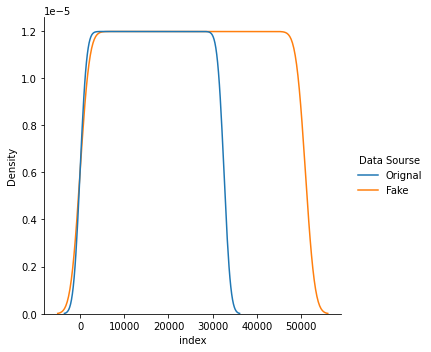

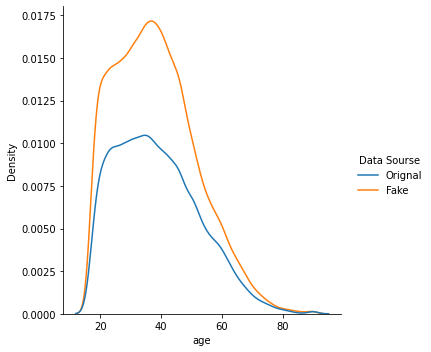

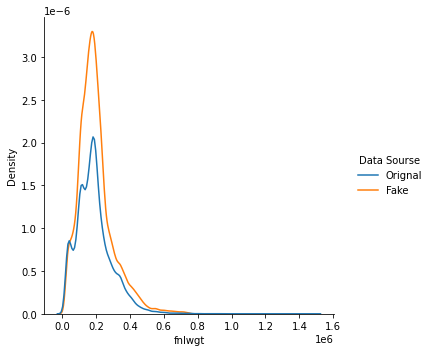

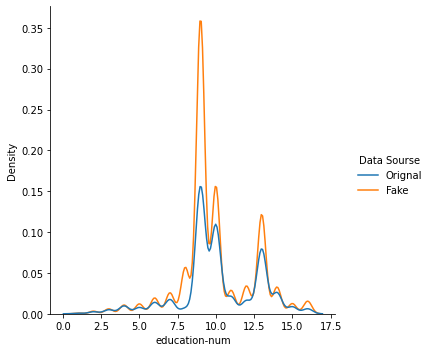

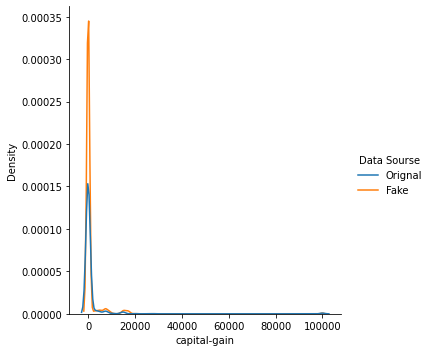

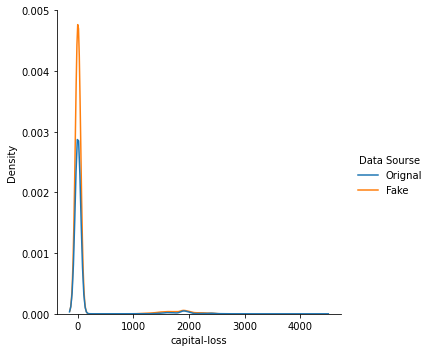

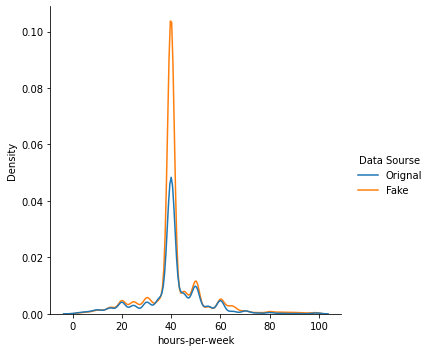

In [ ]:

for column_name, column_series in df_compare.iloc[:, :-1].iteritems():
     pass
     sns.displot(df_compare, x=df_compare[column_name], hue="Data Sourse", kind="kde")

## Preparing data for Machine Learning
Now its a time to convert categorical data in to its numerical meanings so that we can apply ML models to evaluate the performance of Models .Following are the encoding techniques we will use to preprocess categorical data 

- Label encoding 
- One-Hot encoding 
Now we have generated categorical data 

In [ ]:
encode(x,'workclass','marital-status','occupation','relationship','race','sex','native-country')
encode(x_GAN,'workclass','marital-status','occupation','relationship','race','sex','native-country')



Enter encode typelabel


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Enter encode typelabel


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,73936,5th-6th,14,2,10,0,3,0,18,4,40,14
1,29,7,199806,11th,13,2,2,0,0,1,458,7,40,14
2,34,0,60574,Bachelors,9,6,1,0,3,1,11,8,40,1
3,51,5,34068,Some-college,9,4,10,0,3,0,25,6,40,19
4,63,2,70342,Some-college,6,4,0,0,3,0,27,3,40,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33485,61,4,423297,Doctorate,16,2,10,0,4,1,0,0,40,38
33486,31,2,446358,Doctorate,16,4,10,1,4,1,0,0,50,25
33487,36,6,408427,Prof-school,15,2,10,0,4,1,0,0,60,38
33488,50,4,485710,Doctorate,16,0,10,1,4,0,0,0,50,38


In [ ]:
x=encode(x,'education')
x_GAN=encode(x_GAN,'education')

Enter encode typeone-hot
Enter encode typeone-hot


### Performance Evaluation of Machine Learning Models 

In [ ]:
X_train_real, X_test_real, y_train_real, y_test_real = sklearn.model_selection.train_test_split(x,y, test_size=0.33, random_state=42)
orignal=Model_Evaluation(X_train_real,y_train_real,X_test_real,y_test_real)
Fake=Model_Evaluation(x_GAN,y_GAN,X_test_real,y_test_real)


**Computionaly intractable to train on huge dataset like census data**

# **Regression**

# Data set 4:  **NASA dataset** 
obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel. The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/airfoil+self-noise

ouput features:

**f**: Frequency in Hertzs [Hz].
**alpha**: Angle of attack (AoA, α), in degrees [°].
c: **Chord length**, in meters [m].
**U_infinity**: Free-stream velocity, in meters per second [m/s].
**delta**: Suction side displacement thickness (𝛿), in meters [m].
Output:

**SSPL**: Scaled sound pressure level, in decibels [dB].








In [ ]:
path = "/content/drive/MyDrive/Data Sets For TABGAN/AirfoilSelfNoise.csv"
df4 = pd.read_csv(path)
print(df4.shape)
df4.head(5)



(1503, 6)


,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


### Generating Fake NASA data using CGAN

In [ ]:
#real data 
x=df4.iloc[:,:-1]
y=df4.iloc[:,-1]

X_train_real, X_test_real, y_train_real, y_test_real = sklearn.model_selection.train_test_split(x,y, test_size=0.33, random_state=42)

#Gans requires pandas df 
X_train_real=pd.DataFrame(X_train_real)
y_train_real=pd.DataFrame(y_train_real)
X_test_real=pd.DataFrame(X_test_real)


x_GAN, y_GAN=Datagen(X_train_real,y_train_real,X_test_real)

Fitting CTGAN transformers for each column:   0%|          | 0/6 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/1000 [00:00<?, ?it/s]

## **Real vs fake data**

In [ ]:
x.head(5)

,f,alpha,c,U_infinity,delta
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663


**Fake**

In [ ]:

x_GAN.head(5)

,f,alpha,c,U_infinity,delta
0,3453,0.436422,0.236389,37.976174,0.050527
1,2629,0.439519,0.242904,39.391518,0.047961
2,2907,0.840696,0.235808,39.475664,0.015624
3,3769,0.806851,0.248087,39.437050,0.027420
4,3941,1.291753,0.238241,35.277718,0.016156


In [ ]:
x_GAN['Data Sourse']='Fake'
x['Data Sourse']='Orignal'
df_compare=pd.concat([x,x_GAN])
df_compare = df_compare.reset_index()

## Comparing the densities of Fake and Real data

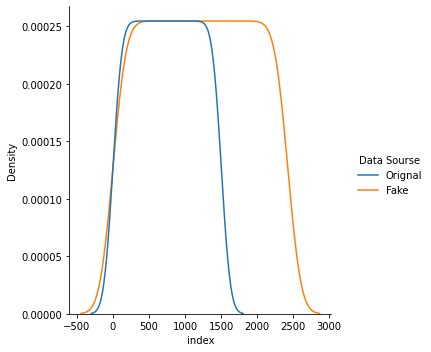

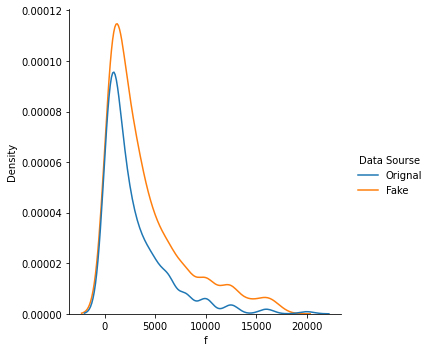

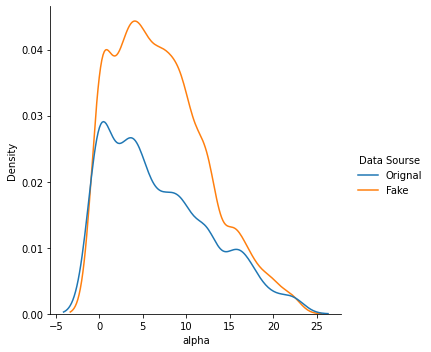

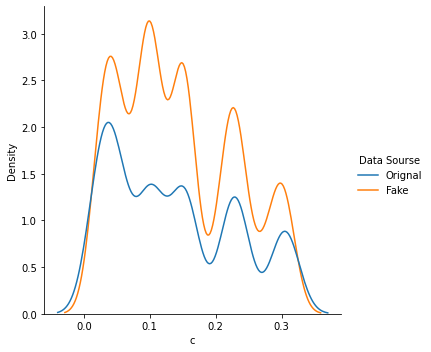

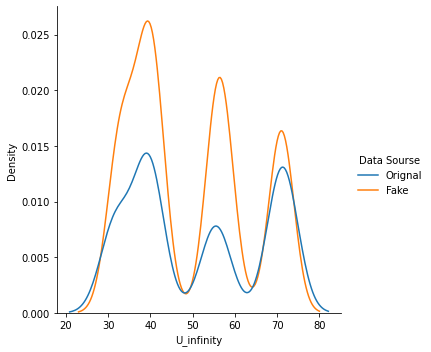

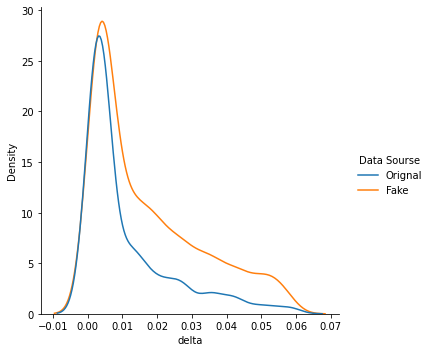

In [ ]:

for column_name, column_series in df_compare.iloc[:, :-1].iteritems():
     pass
     sns.displot(df_compare, x=df_compare[column_name], hue="Data Sourse", kind="kde")

CGAN provided extreamely good data as we have observed that CGAN was able to learn extremely complex paterns of the orignal data 

In [ ]:
X_train_real, X_test_real, y_train_real, y_test_real = sklearn.model_selection.train_test_split(x,y, test_size=0.33, random_state=42)
orignal=Model_Evaluation_reg(X_train_real,y_train_real,X_test_real,y_test_real)
Fake=Model_Evaluation_reg(x_GAN,y_GAN,X_test_real,y_test_real)

Support Vector Machine
R2=squared 0.11649932904323934
Random Forest
R2=squared 0.49044217008039015
Mulilaryer Perceptron
R2=squared -25.634150344597018
Adaboost
R2=squared 0.6753962704389687
Support Vector Machine
R2=squared 0.1352645062809592
Random Forest
R2=squared 0.5045577288730358
Mulilaryer Perceptron
R2=squared -23.66592134925911
Adaboost
R2=squared 0.3299198562072536


Apart from **adaboost** and** MLP regressor **the performance of the models enhanced when we used fake data to train which shows how powerfull is CGAN to estimate the densities of the orignal data .

# Data Set 5 **Weather Prediction** 
It contains fourteen numerical weather prediction (NWP)'s meteorological forecast data, two in-situ observations, and five geographical auxiliary variables over Seoul, South Korea in the summer.

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In [ ]:
path = "/content/drive/MyDrive/Data Sets For TABGAN/Bias_correction_ucl.csv"
df5 = pd.read_csv(path)
print(df5.shape)
df5.head(5)



(7752, 25)


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [ ]:
df5.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [ ]:
df5=df5.drop(['Date'],axis=1)

Drop the date columns as we are trying to solve  on classification problem 

In [ ]:
df5.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Dataset contains few null values and we decided to drop them !

In [ ]:
df5=df5.dropna()

In [ ]:
#real data 
x=df5.iloc[:,:-1]
y=df5.iloc[:,-1]

X_train_real, X_test_real, y_train_real, y_test_real = sklearn.model_selection.train_test_split(x,y, test_size=0.33, random_state=42)

#Gans requires pandas df 
X_train_real=pd.DataFrame(X_train_real)
y_train_real=pd.DataFrame(y_train_real)
X_test_real=pd.DataFrame(X_test_real)


x_GAN, y_GAN=Datagen(X_train_real,y_train_real,X_test_real)

Fitting CTGAN transformers for each column:   0%|          | 0/24 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
x_GAN.head(5)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,1.427264,36.258210,19.786653,64.314081,87.428791,27.708091,22.237259,9.811482,73.488930,0.141965,...,0.003878,9.300664,0.536250,6.532193,37.583852,127.118797,21.386302,2.090196,5938.766614,37.063732
1,5.073740,26.276310,23.188860,38.030521,70.783178,35.084274,19.250932,5.631681,50.449522,0.226393,...,1.782036,15.199440,0.023978,0.083211,37.507204,126.960951,185.760306,2.580704,5921.709217,37.210840
2,9.607332,33.967019,27.758963,42.639439,77.776326,29.866534,21.935326,4.394704,113.162794,0.747437,...,3.049630,12.527773,0.481388,5.310001,37.542593,127.012447,66.685771,0.952259,5961.855852,36.712413
3,12.000000,25.600000,20.900000,83.329033,99.694397,24.924265,22.583051,10.054382,38.113474,0.897978,...,10.786778,9.100507,0.000306,0.052057,37.550700,126.988000,132.118000,0.593100,5912.886230,28.600000
4,1.000000,28.300000,21.200000,72.798576,97.642792,25.276716,21.142562,15.608045,64.914946,0.615612,...,0.804222,9.933111,0.237004,0.848082,37.604600,126.991000,212.335000,2.785000,5987.718750,24.800000


In [ ]:
X_train_real, X_test_real, y_train_real, y_test_real = sklearn.model_selection.train_test_split(x,y, test_size=0.33, random_state=42)
orignal=Model_Evaluation_reg(X_train_real,y_train_real,X_test_real,y_test_real)
Fake=Model_Evaluation_reg(x_GAN,y_GAN,X_test_real,y_test_real)

Support Vector Machine
R2=squared 0.13224615001784978
Random Forest
R2=squared 0.6149714449798092
Mulilaryer Perceptron
R2=squared 0.8032681597313036
Adaboost
R2=squared 0.8108262072314107
Support Vector Machine
R2=squared 0.12034937366648135
Random Forest
R2=squared 0.6046920674936191
Mulilaryer Perceptron
R2=squared 0.7825192719041212
Adaboost
R2=squared 0.7501219513183949


We can observe that the performace of the models ddi not affected too much when we train the models over fake data which means that CGAN efficiently  estimated the weather prediction data distribution 

In [ ]:
x_GAN['Data Sourse']='Fake'
x['Data Sourse']='Orignal'
df_compare=pd.concat([x,x_GAN])
df_compare = df_compare.reset_index()

## Fake vs Real weather data distribution 

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

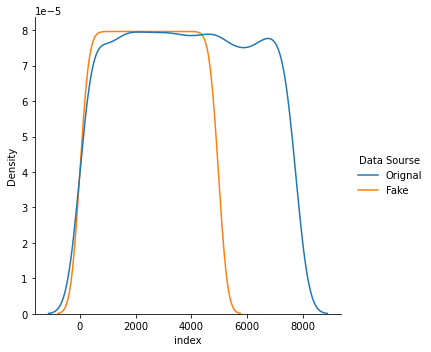

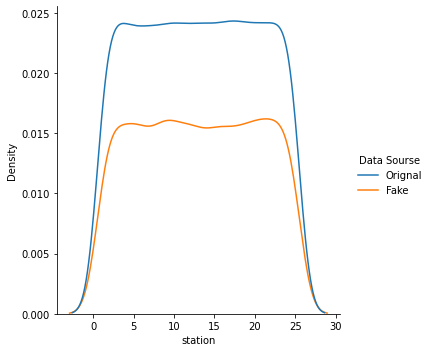

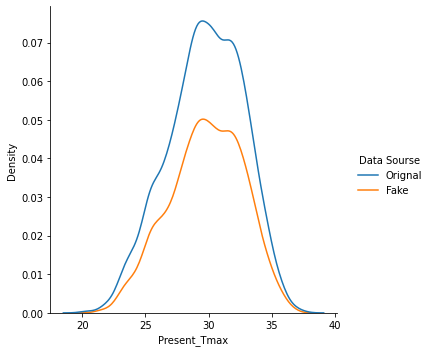

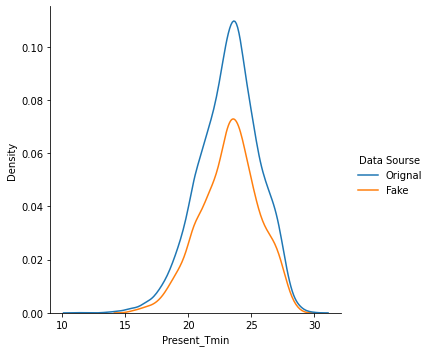

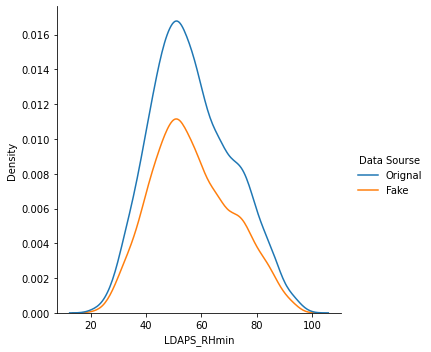

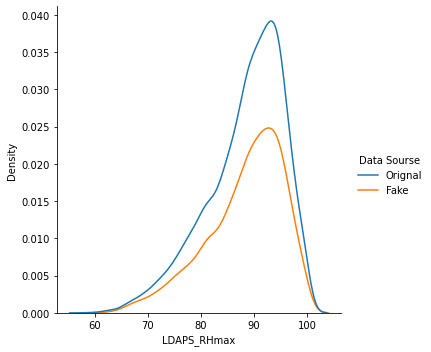

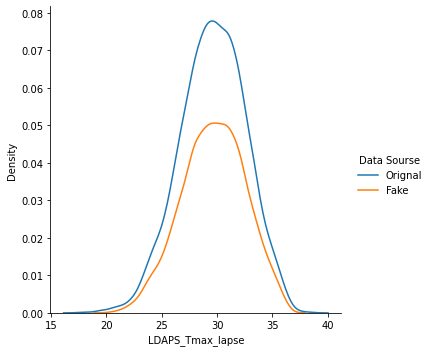

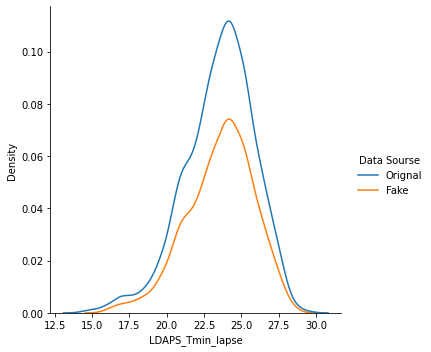

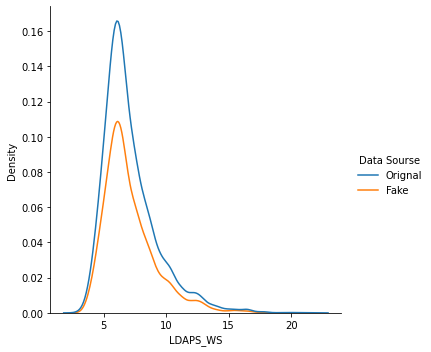

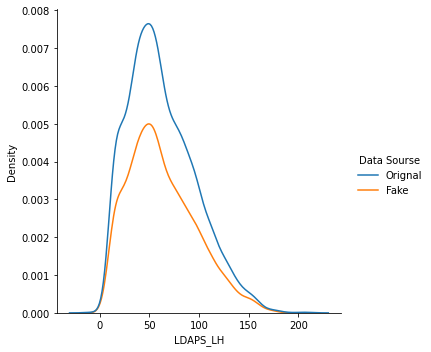

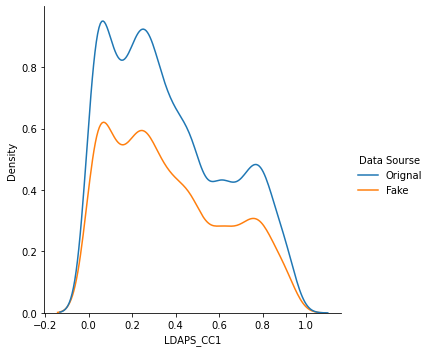

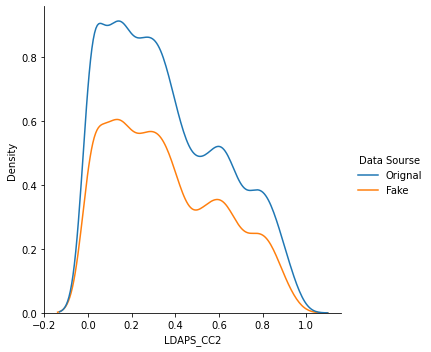

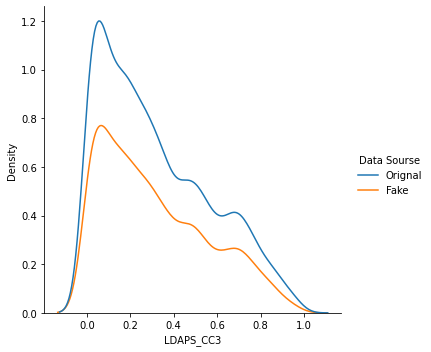

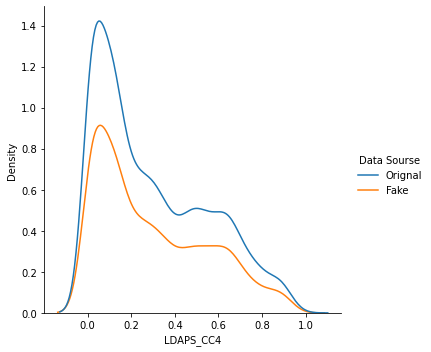

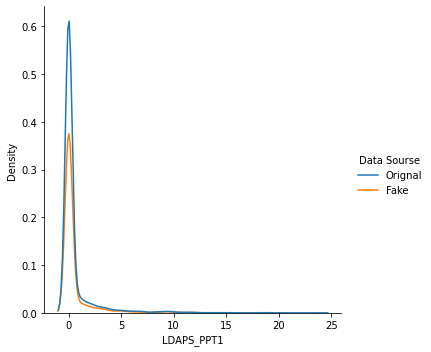

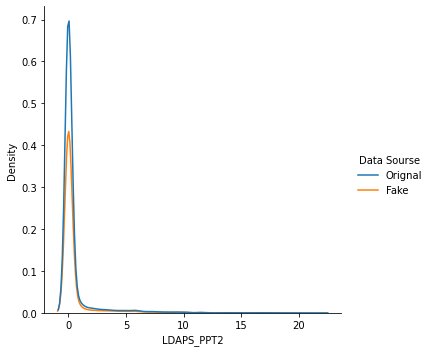

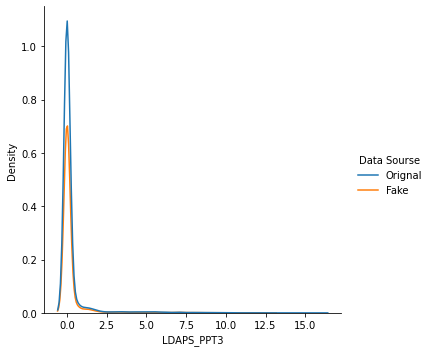

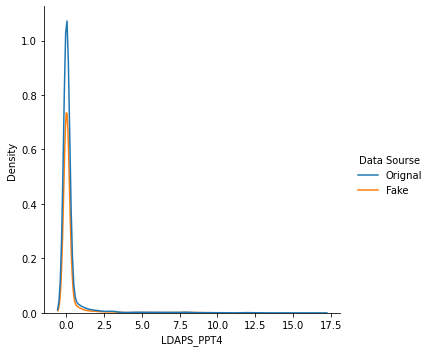

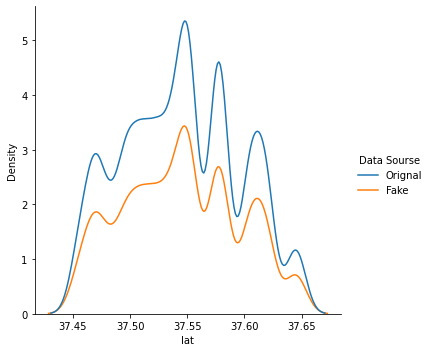

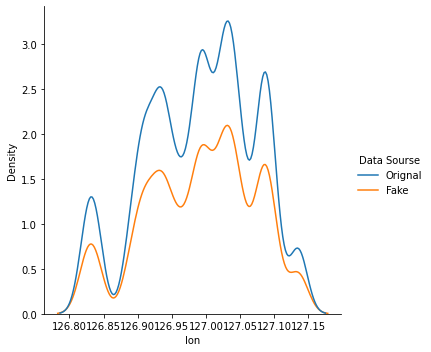

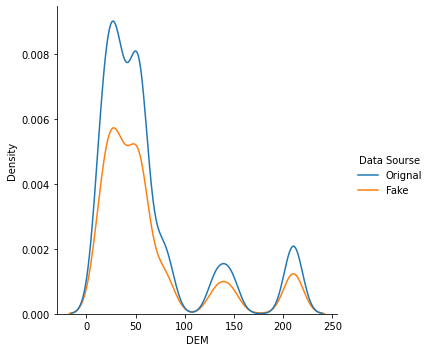

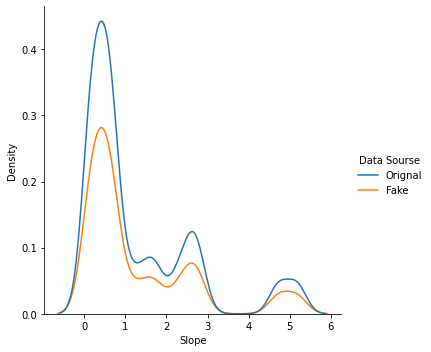

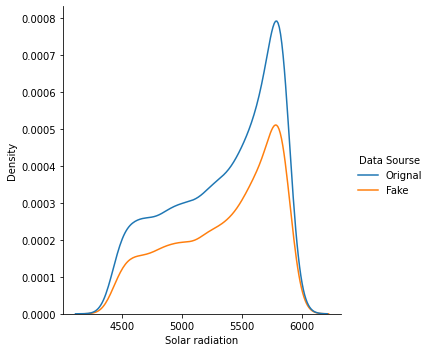

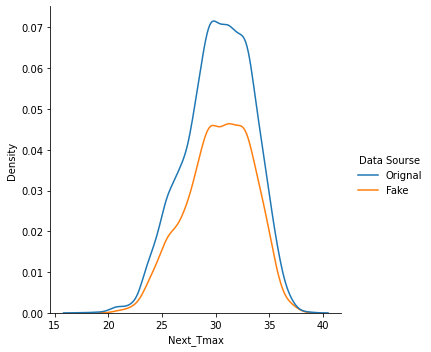

In [ ]:

for column_name, column_series in df_compare.iloc[:, :-1].iteritems():
     pass
     sns.displot(df_compare, x=df_compare[column_name], hue="Data Sourse", kind="kde")

# **SUMMARY** 
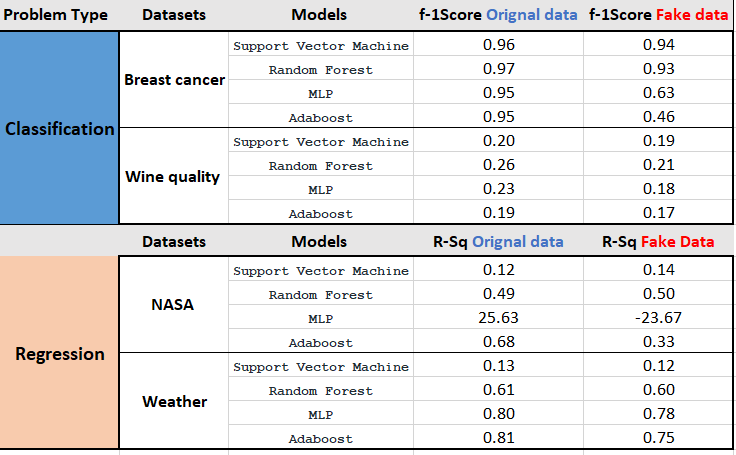


From the above summary of classification and Regression datasets we can conclude that the performance of the state of the art Machine learning algorithms did not affected when we train the models with Fake data however slight reduction of the model performance was observed which indicated that CGAN does not copying the entire distribution but it adds  drift to the orignal data which can be taken as an opportuinity to protect  the models against **concept drift** which is usually observed with real world datasets .